![image.png](https://i.pinimg.com/originals/12/ce/73/12ce73e17aa3e2a1d6cd8d18c61ce805.jpg)

<div style="padding:10px 10px 10px; 
            color:#000000;;
            font-size:30px;
            display:fill;
            text-align:center;
            border-radius:0px;
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            border: 5px double;
            border-color:blue;
            background-color: #E8F1F2;
            border-image: linear-gradient(to right, grey, yellow) 1; /* Градиент для бордера */
            background-color: #D3D3D3; /* Серый фон */
            overflow:hidden;
            border-width: 20px;
            border-style: groove;
            font-weight:400"> 
<p style="font-weight: bold; text-align: center;">ПРОЕКТ:Определение температуры поверхности звезд.</p>

</div>

<div style="padding:0px 40px 30px; 
            color:#4B2E2E;
            font-size:110%;
            display:fill;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:450"> 
    
__Цель:__ Ученые- астрономы давно мечтают научиться прогнозировать наступление сверхновой у какой-нибудь видимой звезды, например у Бетельгейзе.  Дело в том, что взрыв сверхновой очень редкое явление. Если астрономы получат еще больше данных о сверхновой, то это может заполнить многие пробелы в познании науки, нас тогда ждет множество новых открытий. Наша цель - научиться получать данные о температуре поверхности звезд, используя предоставленные данные об уже исследованных звездах.
    
__Мы используем:__ 
- Модель нейронной сети
- метрика качества работы модели RMSE  
    
__Обычно для расчёта температуры учёные пользуются следующими методами:__
    
</div>

<h3 class="alert alert-info">Закон смещения Вина</h3>


<h3 class="alert alert-info">Закон Стефана-Больцмана</h3>


<h3 class="alert alert-info">Спектральный анализ</h3>


<a href="https://old.bigenc.ru/physics/text/1914594" class="btn btn-warning" role="button">Закон смещения Вина -></a>

<a href="https://ru.wikipedia.org/wiki/Закон_Стефана_—_Больцмана" class="btn btn-warning" role="button">Закон Стефана-Больцмана -></a>

<a href="https://ru.wikipedia.org/wiki/Спектральный_анализ" class="btn btn-warning" role="button">Спектральный анализ -></a>


У каждого из перечисленных методов есть свои плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным. Наша задача создать нейросеть, обладающую данными свойствами.

**Для выполнения поставленной задачи будут выполнены следующие шаги:**

1. Загрузка данных

2. Исследовательский анализ данных и предподготовка

3. Разработка базовой модели

4. Подбор гиперпараметров для модели

5. Обучение модели на лучших гиперпараметрах

6. Получение предсказаний и метрики

7. Выводы на основании полученного результата

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Загрузка данных
    
</div>

**Необходимые импорты:**

In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install torch==1.10.0+cpu torchvision==0.11.0+cpu torchaudio==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html --user

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [3]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install optuna

In [5]:
import random
import numpy as np
import pandas as pd
import itertools
import torch
import torch.nn as nn
import torch.optim as optim
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.compose import(
    make_column_selector,
    make_column_transformer,
    ColumnTransformer
)
from sklearn.impute import SimpleImputer
# Обработка данных для машинного обучения
# Стандартизация данных
import re

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import(
    OneHotEncoder, # Создание отдельных столбцов для каждого категориального значения, drop='first' (удаление первого столбца против dummy-ловушки), sparse=False (?)
    OrdinalEncoder, # Кодирование порядковых категориальных признаков
    #TargetEncoder, # Кодирование категорий на основе таргетов (ошибка, модуль не найден)
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# Другие функции предобработки данных # Заполнение пропусков в данных методом k-блжиайших соседей.
from sklearn.utils import shuffle # Перемешивание данных для уравновешивания их в разных выборках


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
from pandas.plotting import scatter_matrix
import plotly.express as px
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import matplotlib.cm as cm

import phik
from phik import report
from phik.report import plot_correlation_matrix

import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import KFold
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

**Необходимые функции:**

In [6]:
def optimize_memory_usage(df: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
        '''
        Function optimizes memory usage in dataframe
        df: pd.DataFrame - data table
        print_size: bool - display of optimization results
        return pd.DataFrame - amount of optimized memory
        '''
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Типы, которые будем проверять на оптимизацию
        # Размер занимаемой памяти до оптимизации (в Мб)
        before_size = df.memory_usage().sum() / 1024**2
        for column in df.columns:
            column_type = df[column].dtypes
            if column_type in numerics:
                column_min = df[column].min()
                column_max = df[column].max()
                if str(column_type).startswith('int'):
                    if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                        df[column] = df[column].astype(np.int8)
                    elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                        df[column] = df[column].astype(np.int16)
                    elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                        df[column] = df[column].astype(np.int32)
                    elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                        df[column] = df[column].astype(np.int64)
                else:
                    if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                        df[column] = df[column].astype(np.float32)
                    else:
                        df[column] = df[column].astype(np.float64)
        # Размер занимаемой памяти после оптимизации (в Мб)
        after_size = df.memory_usage().sum() / 1024**2
        if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                            .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
        return df



def set_frame_style_2(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.highlight_null().set_caption(caption).set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'Blue'),
            ('font-size', '18px'),
            ('font-weight','bold')
        ]}])

def check_data_2(data, title):
    cols = data.columns.to_list()
    display(set_frame_style_2(data[cols].head(), f'{title}: Первые 5 строк датафрейма'))
    display(set_frame_style_2(data[cols].describe(), f'{title}: Статистики'))
    display(set_frame_style_2(data[cols].nunique().to_frame().rename({0: 'Уникальные значения'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style_2(data[cols].isna().sum().to_frame().transpose(), f'{title}: Столбцы с пропусками'))

    # Создаем датафрейм с подсчетом дубликатов
    duplicates_count = data.duplicated().sum()
    duplicates_df = pd.DataFrame(data=[duplicates_count], index=['Duplicates'], columns=['Count'])
    display(set_frame_style_2(duplicates_df, f'{title}: Подсчет дубликатов'))
    
    info_str = data.info()
    info_df = pd.DataFrame(data=[info_str], index=['Info'], columns=['Info'])
    display(set_frame_style_2(info_df, f'{title}: Информация о данных'))
    display(set_frame_style_2(data[cols].isnull().sum().to_frame().rename(columns={0: 'Пропуски'}).transpose(), f'{title}: Подсчет пропусков'))

In [7]:
def plot_histogram_with_stats_(data):
    """
    Функция для построения гистограммы с основной статистикой для числовых столбцов датафрейма.

    Параметры:
    data (pandas.DataFrame) - датафрейм, для которого необходимо построить гистограмму.
    """
    # Выбираем только числовые столбцы
    numeric_cols = data.select_dtypes(include=['int32', 'int8', 'float32', 'float64']).columns

    if not numeric_cols.empty:
        # Создаем фигуру и оси
        n_cols = 2  # Количество колонок подграфиков
        n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Количество строк подграфиков
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

        # Плоские массивы осей
        axes = axes.flatten()

        # Проходим по каждому числовому столбцу
        for i, col in enumerate(numeric_cols):
            # Гистограмма
            sns.histplot(data=data, x=col, bins=20, kde=True, ax=axes[i])
            
            # Средняя и медианная линии
            mean = data[col].mean()
            median = data[col].median()
            axes[i].axvline(mean, color='r', linestyle='--', label='Mean')
            axes[i].axvline(median, color='g', linestyle='--', label='Median')
            axes[i].legend()
            # Основная статистика
            stats = data[col].describe()
            axes[i].text(0.1, 0.5, f'Mean: {stats["mean"]:.2f}\nMedian: {stats["50%"]:.2f}\nStd: {stats["std"]:.2f}\nMin: {stats["min"]:.2f}\nMax: {stats["max"]:.2f}', transform=axes[i].transAxes)
            
            # Вычисление квантилей и выбросов
            lower_quantile_value = data[col].quantile(0.01)
            upper_quantile_value = data[col].quantile(0.99)
            outliers = data[(data[col] < lower_quantile_value) | (data[col] > upper_quantile_value)]
            outliers_percentage = len(outliers) / len(data) * 100
            
            axes[i].set_title(f'Histogram of {col}\nВыбросы: {outliers_percentage:.2f}%')


        # Удаляем ненужные подграфики
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print("Датафрейм не содержит числовых столбцов.")

In [8]:
try:
    data = pd.read_csv('/datasets/6_class.csv', sep=',', index_col=0)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/6_class.csv', sep=',', index_col=0)

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Предобработка и разведочный анализ данных
    
</div>

In [9]:
optimize_memory_usage(data)

Размер использования памяти: до  0.01 Mb - после  0.01 Mb (41.1%)


Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0               3068          0.002400        0.1700               16.120001   
1               3042          0.000500        0.1542               16.600000   
2               2600          0.000300        0.1020               18.700001   
3               2800          0.000200        0.1600               16.650000   
4               1939          0.000138        0.1030               20.059999   
..               ...               ...           ...                     ...   
235            38940     374830.000000     1356.0000               -9.930000   
236            30839     834042.000000     1194.0000              -10.630000   
237             8829     537493.000000     1423.0000              -10.730000   
238             9235     404940.000000     1112.0000              -11.230000   
239            37882     294903.000000     1783.0000               -7.800000   

     Star type Star color  
0            0        Red  
1            0        Red  
2            0        Red  
3            0        Red  
4            0        Red  
..         ...        ...  
235          5       Blue  
236          5       Blue  
237          5      White  
238          5      White  
239          5       Blue  

[240 rows x 6 columns]

In [10]:
 check_data_2(data, 'All data')

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int32  
 1   Luminosity(L/Lo)        240 non-null    float32
 2   Radius(R/Ro)            240 non-null    float32
 3   Absolute magnitude(Mv)  240 non-null    float32
 4   Star type               240 non-null    int8   
 5   Star color              240 non-null    object 
dtypes: float32(3), int32(1), int8(1), object(1)
memory usage: 7.7+ KB


**Характеристики**

•	Относительная светимость L/Lo — светимость звезды относительно Солнца.

•	Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.

•	Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.

•	Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.

•	Тип звезды.

**Тип звезды	Номер, соответствующий типу**

1. Коричневый карлик	                0
2. Красный карлик	                    1
3. Белый карлик	                    2
4. Звёзды главной последовательности	3
5. Сверхгигант	                        4
6. Гипергигант      	                5

•	Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.


Беглый просмотр показал, что пропуски отсутствуют. Столбец 4 Star type содержит всего 6 уникальных значений, т.е его можно перевести в категориальный. 

In [11]:
data['Temperature (K)'].unique()

array([ 3068,  3042,  2600,  2800,  1939,  2840,  2637,  2650,  2700,
        3600,  3129,  3134,  3628,  3340,  2799,  3692,  3192,  3441,
       25000,  7740,  7220,  8500, 16500, 12990,  8570,  7700, 11790,
        7230, 39000, 30000, 15276,  9700,  5800,  8052,  6757,  6380,
        5936,  5587,  3826,  3365,  3270,  3200,  3008,  3575,  3574,
        3625, 33750,  3490,  3750,  3834,  3749,  3650,  3450,  3660,
        3752,  3535,  3341,  3432,  2983,  2835,  2935,  3295,  2945,
        2817,  2774,  2871,  3345,  3607,  3304,  3150,  3550,  3180,
        2890,  3342,  2621,  3158,  7100, 10574,  8930, 17200, 14100,
        9675, 12010, 10980, 13720, 19860,  5300,  4526,  4077,  4980,
        9030, 11250,  5112,  7720, 12098, 36108, 33300, 40000, 23000,
       17120, 11096, 14245, 24630, 12893, 24345, 33421,  3459,  3605,
        3615,  3399,  3610,  3553,  4015,  6850,  3780,  3323,  3531,
        3218,  3146,  3511,  3225,  2861,  2856,  2731,  3095,  3100,
        2989,  3542,

In [12]:
data['Luminosity(L/Lo)'].unique()

array([2.40000e-03, 5.00000e-04, 3.00000e-04, 2.00000e-04, 1.38000e-04,
       6.50000e-04, 7.30000e-04, 4.00000e-04, 6.90000e-04, 1.80000e-04,
       2.90000e-03, 1.22000e-02, 5.50000e-03, 6.00000e-04, 3.80000e-03,
       1.80000e-03, 3.67000e-03, 3.62000e-03, 3.90000e-02, 5.60000e-02,
       4.90000e-04, 1.70000e-04, 1.30000e-02, 8.50000e-05, 8.10000e-04,
       1.10000e-04, 1.50000e-04, 8.00000e-05, 2.04000e+05, 2.88400e+04,
       1.13600e+03, 7.40000e+01, 8.10000e-01, 8.70000e+00, 1.43000e+00,
       1.35000e+00, 1.35700e+00, 8.19000e-01, 2.00000e+05, 3.40000e+05,
       1.50000e+05, 1.95000e+05, 2.80000e+05, 3.20000e+05, 1.23000e+05,
       1.84000e+05, 2.20000e+05, 2.70000e+05, 2.83000e+05, 2.72000e+05,
       5.50000e+05, 3.10000e+05, 2.63000e+05, 3.63000e+05, 1.74000e+05,
       2.09000e+05, 5.60000e-03, 6.70000e-04, 2.40000e-04, 3.40000e-04,
       1.40000e-04, 9.80000e-04, 3.20000e-04, 3.60000e-04, 7.20000e-04,
       2.10000e-02, 2.20000e-02, 8.50000e-03, 8.80000e-03, 4.000

In [13]:
data['Radius(R/Ro)'].unique()

array([1.7000e-01, 1.5420e-01, 1.0200e-01, 1.6000e-01, 1.0300e-01,
       1.1000e-01, 1.2700e-01, 9.6000e-02, 1.3000e-01, 5.1000e-01,
       3.7610e-01, 1.9600e-01, 3.9300e-01, 1.4000e-01, 2.4000e-01,
       4.7000e-01, 1.9670e-01, 3.5100e-01, 8.4000e-03, 1.2340e-02,
       1.1000e-02, 1.0000e-02, 1.4000e-02, 9.8400e-03, 9.7000e-03,
       1.2800e-02, 1.3000e-02, 1.0600e+01, 6.3000e+00, 7.2000e+00,
       2.8900e+00, 9.0000e-01, 1.8000e+00, 1.1200e+00, 9.8000e-01,
       1.1060e+00, 9.9000e-01, 1.9000e+01, 2.3000e+01, 8.8000e+01,
       1.7000e+01, 2.5000e+01, 2.9000e+01, 4.5000e+01, 8.9000e+01,
       8.4000e+01, 2.6000e+01, 1.5200e+03, 1.2600e+03, 1.1830e+03,
       1.6480e+03, 1.3240e+03, 1.3490e+03, 1.6730e+03, 1.2840e+03,
       9.5500e+02, 1.5460e+03, 5.7000e-02, 1.9000e-01, 9.4000e-02,
       9.1800e-02, 1.1600e-01, 1.3200e-01, 9.3000e-02, 9.1100e-02,
       1.1800e-01, 1.2000e-01, 2.7300e-01, 3.8000e-01, 1.8000e-01,
       3.5000e-01, 2.9100e-01, 3.0700e-01, 9.8000e-02, 1.6100e

In [14]:
data['Absolute magnitude(Mv)'].unique()

array([ 1.6120e+01,  1.6600e+01,  1.8700e+01,  1.6650e+01,  2.0060e+01,
        1.6980e+01,  1.7220e+01,  1.7400e+01,  1.7450e+01,  1.6050e+01,
        1.0690e+01,  1.1790e+01,  1.3210e+01,  1.0480e+01,  1.1782e+01,
        1.3070e+01,  1.4790e+01,  1.0800e+01,  1.3530e+01,  1.1180e+01,
        1.0580e+01,  1.4020e+01,  1.4230e+01,  1.4500e+01,  1.1890e+01,
        1.2230e+01,  1.4200e+01,  1.4470e+01,  1.2590e+01,  1.4080e+01,
       -4.7000e+00, -4.2000e+00, -1.9700e+00,  1.6000e-01,  5.0500e+00,
        2.4200e+00,  2.4100e+00,  2.9300e+00,  4.4600e+00,  5.0300e+00,
       -6.9300e+00, -6.2000e+00, -6.0200e+00, -7.2200e+00, -6.0000e+00,
       -6.6000e+00, -6.7800e+00, -5.2400e+00, -6.7400e+00, -6.1000e+00,
       -9.4000e+00, -7.6300e+00, -9.2000e+00, -8.0500e+00, -7.7900e+00,
       -1.1750e+01, -1.1920e+01, -1.1280e+01, -1.1240e+01, -1.1360e+01,
        1.6230e+01,  1.6940e+01,  1.6090e+01,  1.6960e+01,  1.8890e+01,
        1.7130e+01,  1.8340e+01,  1.6450e+01,  1.7390e+01,  1.94

In [15]:
data['Star type'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int8)

In [16]:
data['Star type'].value_counts().head(10)

Star type
0    40
1    40
2    40
3    40
4    40
5    40
Name: count, dtype: int64

In [17]:
data['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [18]:
data['Star color'].value_counts().head(20)

Star color
Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: count, dtype: int64

Обнаружены неявные дубликаты в столбце Star color. Необходимо привести их в соответствие, что уменьшит количество уникальных значений в этом столбце

In [19]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Blue White', 'Blue white', 'Blue-white', 'Blue white ', 'Blue-White'], 'blue_White')

In [20]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['White', 'white'], 'white')

In [21]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['yellowish', 'Yellowish'], 'yellowish')

In [22]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Blue', 'Blue '], 'Blue')

In [23]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Orange-Red'], 'Orange')

In [24]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Orange-Red', 'Pale yellow orange'], 'Orange')

In [25]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Whitish'], 'white')

In [26]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['Yellowish White'], 'yellowish')

In [27]:
# Объединение неявно совпадающих значений признака "Star color"

data['Star color'] = data['Star color'].replace(['yellow-white', 'White-Yellow'], 'yellow_white')

In [28]:
data['Star color'].value_counts().head(20)

Star color
Red             112
Blue             56
blue_White       41
white            12
yellow_white      9
yellowish         6
Orange            4
Name: count, dtype: int64

Переименуем столбцы для дальнейшей работы.

In [29]:
mapping = {'Temperature (K)': 'Temperature',
           'Luminosity(L/Lo)': 'Luminosity',
           'Radius(R/Ro)': 'Radius',
           'Absolute magnitude(Mv)': 'Absolute_magnitude',
           'Star_type': 'Star_type',
           'Star color': 'Star_color',
           'category_Star_type': 'category_Star_type'}
data.rename(columns=mapping, inplace=True)

##### Выводы:

Были загружены данные: датафрейм 240 rows × 6 columns, размер датафрейма был оптимизирован, уменьшен на 41%

Были проанализированы характеристики столбцов. Пропуски и аномалии отсутствуют. Были удалены неявные дубликаты в столбце по цвету звезд.

Ознакомимся подробнеее с описанием признаков:

<h3 class="alert alert-info">Относительная светимость L/Lo — светимость звезды относительно Солнца</h3>

Первое, что стоит отметить, говоря о светимости звезды — ее легко спутать с другими параметрами светила. Но в деле все очень просто — надо только знать, за что отвечает каждая характеристика.

Светимость звезды (L) отражает в первую очередь количество энергии, излучаемой звездой — и потому измеряется в ваттах, как и любая другая количественная характеристика энергии. Это объективная величина: она не меняется при перемещении наблюдателя. У Солнца этот параметр составляет 3,82 × 1026 Вт. Показатель яркости нашего светила часто используется для измерения светимости других звезд, что куда удобнее для сопоставления — тогда он отмечается как L☉, (☉— это графический символ Солнца.)

<a href="https://spacegid.com/svetimost-zvezdyi.html" class="btn btn-warning" role="button">Относительная светимость L/Lo -></a>

<h3 class="alert alert-info">Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца</h3>

Звезды настолько далеки от нас, что их угловые размеры меньше предела разрешения крупнейших телескопов. Для ярких близких звезд угловой радиус находят по интерференционной картине, которая получается в результате перекрытия изображений звезды, при помощи двух широко расставленных телескопов. Например, с помощью оптического интерферометра, состоящего из двух сферических зеркал диаметром 6,6 м каждое, разнесенных на максимальное расстояние 180 м, удалось измерить угловой диаметр  Ориона.
Радиусы звезд могут быть вычислены по их мощности излучения (светимости) и температуре. 

<a href="https://ed-lib.ru/astronomy/84-razmery-zvezd.html" class="btn btn-warning" role="button">Относительный радиус R/Ro -></a>

<h3 class="alert alert-info">Absolute magnitude(Mv)</h3>

В астрономии абсолютная звездная величина (M) - это мера светимости небесного объекта по обратной логарифмической астрономической величине. Абсолютная величина объекта определяется как равная видимой величине, которую объект имел бы, если бы его рассматривать с расстояния ровно 10 парсеков (32,6 световых лет), без исчезновения (или затемнения) его света из-за поглощения межзвездным веществом и космической пылью. Гипотетически разместив все объекты на стандартном эталонном расстоянии от наблюдателя, их светимости можно напрямую сравнить друг с другом по шкале звездных величин. Для тел Солнечной системы, которые светятся в отраженном свете, используется другое определение абсолютной звездной величины (H), основанное на стандартном эталонном расстоянии в одну астрономическую единицу.

Абсолютные величины звезд обычно варьируются примерно от -10 до + 20. Абсолютные величины галактик могут быть намного ниже (ярче).

<a href="https://ru.wikipedia.org/wiki/Абсолютная_звёздная_величина" class="btn btn-warning" role="button">Absolute magnitude(Mv) -></a>

<h3 class="alert alert-info">Temperature (K)</h3>

Один важный пункт — некоторые места на поверхности одной и той же звезды могут иметь разную температуру. Перепады достигают нескольких тысяч градусов Цельсия! Все зависит от способа передачи энергии от ядра звезды. Астрофизики выделяют два основных — лучистый перенос и конвекцию:

Во время лучистого переноса энергия ядерного синтеза пробивается из центра звезды прямо сквозь звездное вещество — в виде лучей. Этот путь эффективный с точки зрения сохранения энергии, но очень медленный. Если зона лучистого переноса находится у центра звезды, как у нашего Солнца, путь лучей займет несколько десятков тысяч лет.
Конвекция же базируется на всем нам известном законе природы — теплые жидкости и газы поднимаются наверх, а холодные — опускаются вниз. И так как звезды состоят из газа, конвекция наблюдается и у них. Звездное вещество, разогреваясь у более горячих слоев звезды, поднимается к более холодным зонам светила с меньшим давлением газа. Там забранная изнутри энергия отдается в виде излучения.
Схема движения энергии в звезде солнечного типа

<a href="https://spacegid.com/temperatura-zvezdyi.html" class="btn btn-warning" role="button">Temperature (K) -></a>

<h3 class="alert alert-info">Star type</h3>

В нашей вселенной есть несколько различных типов звезд. Ниже приведен список известных типов звезд.

<a href="https://astronomical.fandom.com/wiki/List_of_star_types" class="btn btn-warning" role="button">Star type -></a>

<h3 class="alert alert-info">Star color</h3>

Звезды имеют множество цветов, включая красный, оранжевый, желтый, белый и синий. Как мы видели, не все звезды одинакового цвета, потому что не все они имеют одинаковую температуру. Чтобы точно определить цвет, астрономы разработали количественные методы для характеристики цвета звезды, а затем использовали эти цвета для определения звездной температуры.закон Вина связывает цвет звезд с температурой. Синие цвета преобладают в видимом излучении очень горячих звезд (с большим дополнительным излучением в ультрафиолетовом диапазоне). С другой стороны, холодные звезды излучают большую часть энергии видимого света на красных длинах волн (при этом больше излучения исходит в инфракрасном диапазоне) (таблица 1). Таким образом, цвет звезды служит показателем ее внутренней или истинной температуры поверхности (помимо эффекта покраснения межзвездной пылью

<a href="https://courses.lumenlearning.com/suny-astronomy/chapter/colors-of-stars/" class="btn btn-warning" role="button">Star color -></a>

Таким образом, можно обобщить, что все наши признаки так или иначе связаны с температурой поверхности звезды. Посмотрим как распределены признаки.

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Исследовательский анализ данных
    
</div>

Построим гистограммы для числовых данных

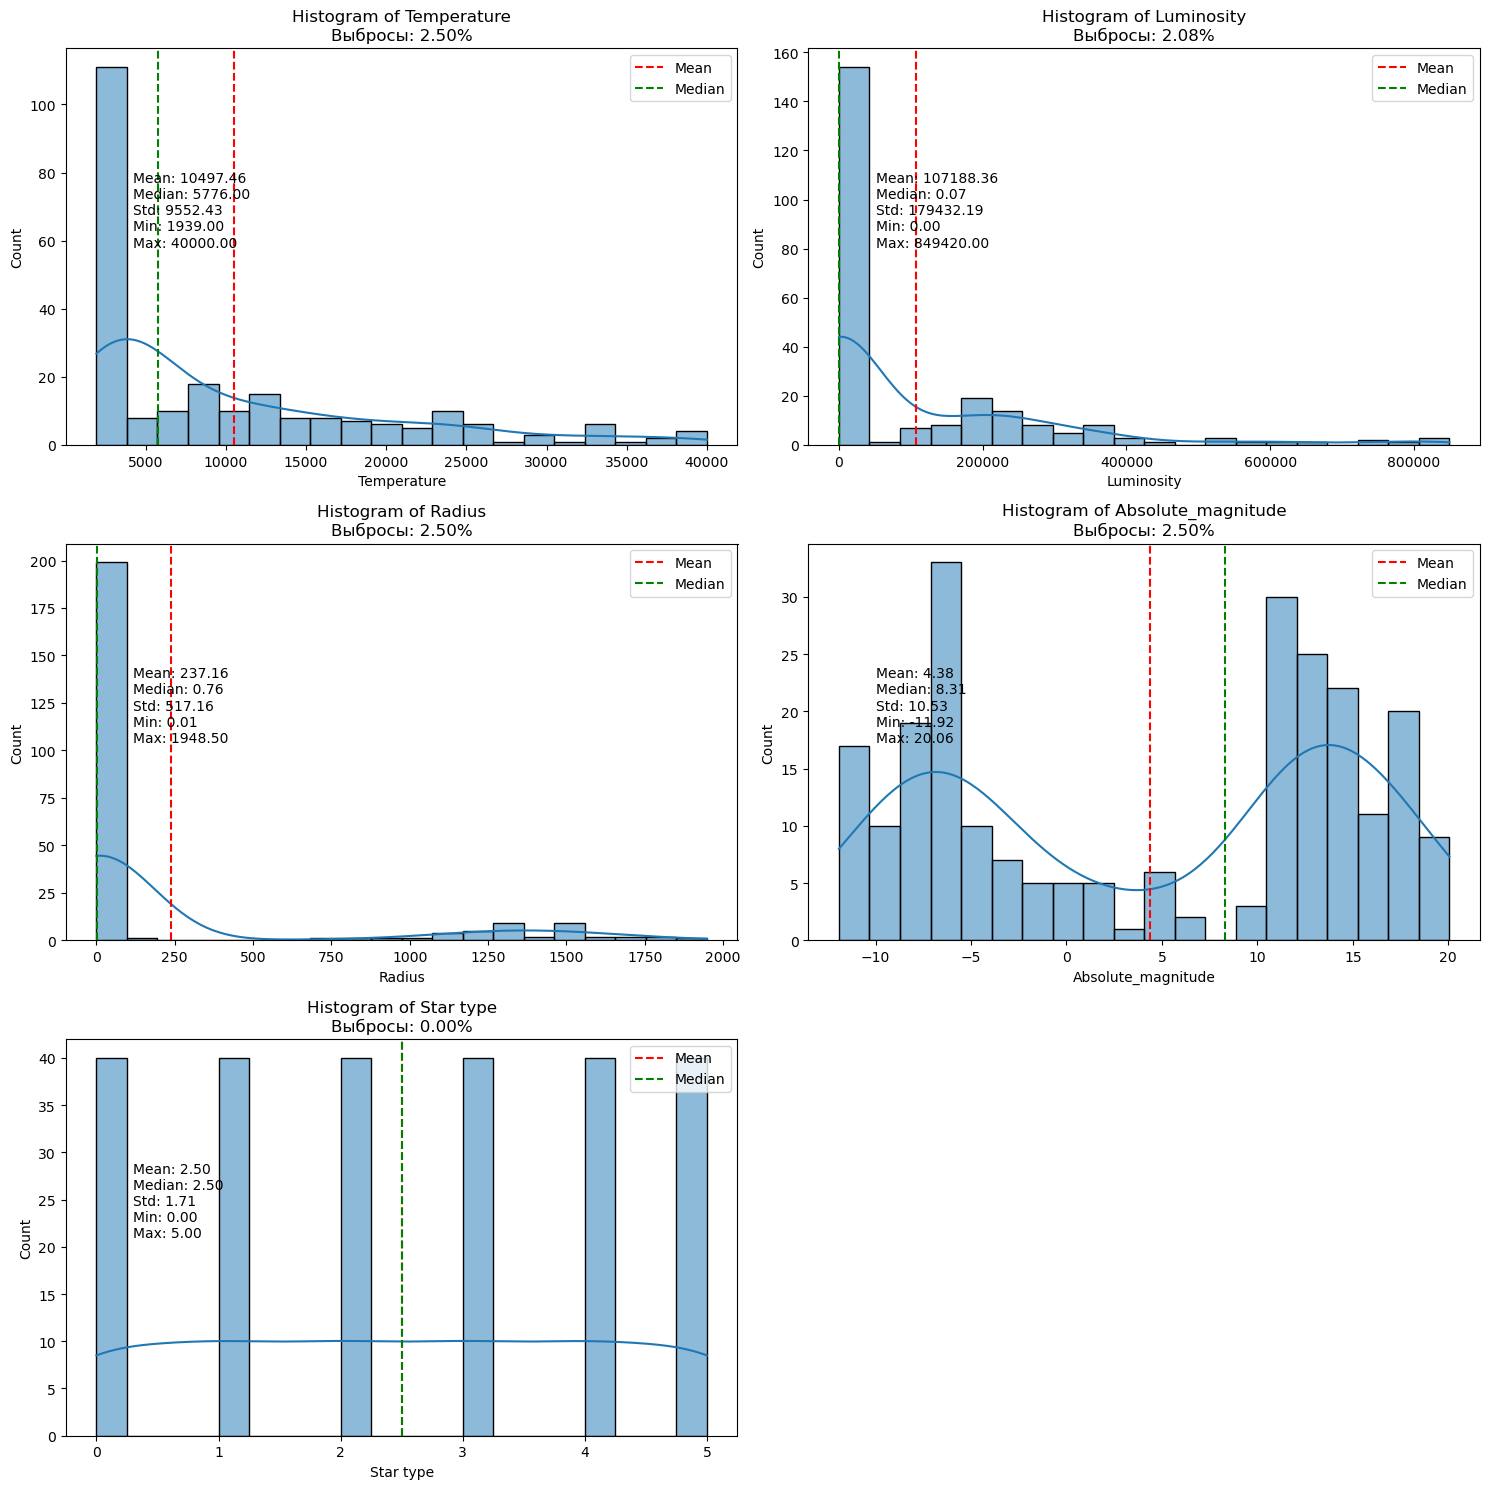

In [30]:
plot_histogram_with_stats_(data)

Похоже, что ни один из числовых признаков не имеет нормального распределения. Признак Star type имеет всего 6 уникальных значений и мы переведем его в категориальные. Посмотрим как распределяются признаки относительно таргета. Дополнительно проведем QQ-тест на определение нормальности распределения признаков

In [31]:
data.columns

Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude',
       'Star type', 'Star_color'],
      dtype='object')

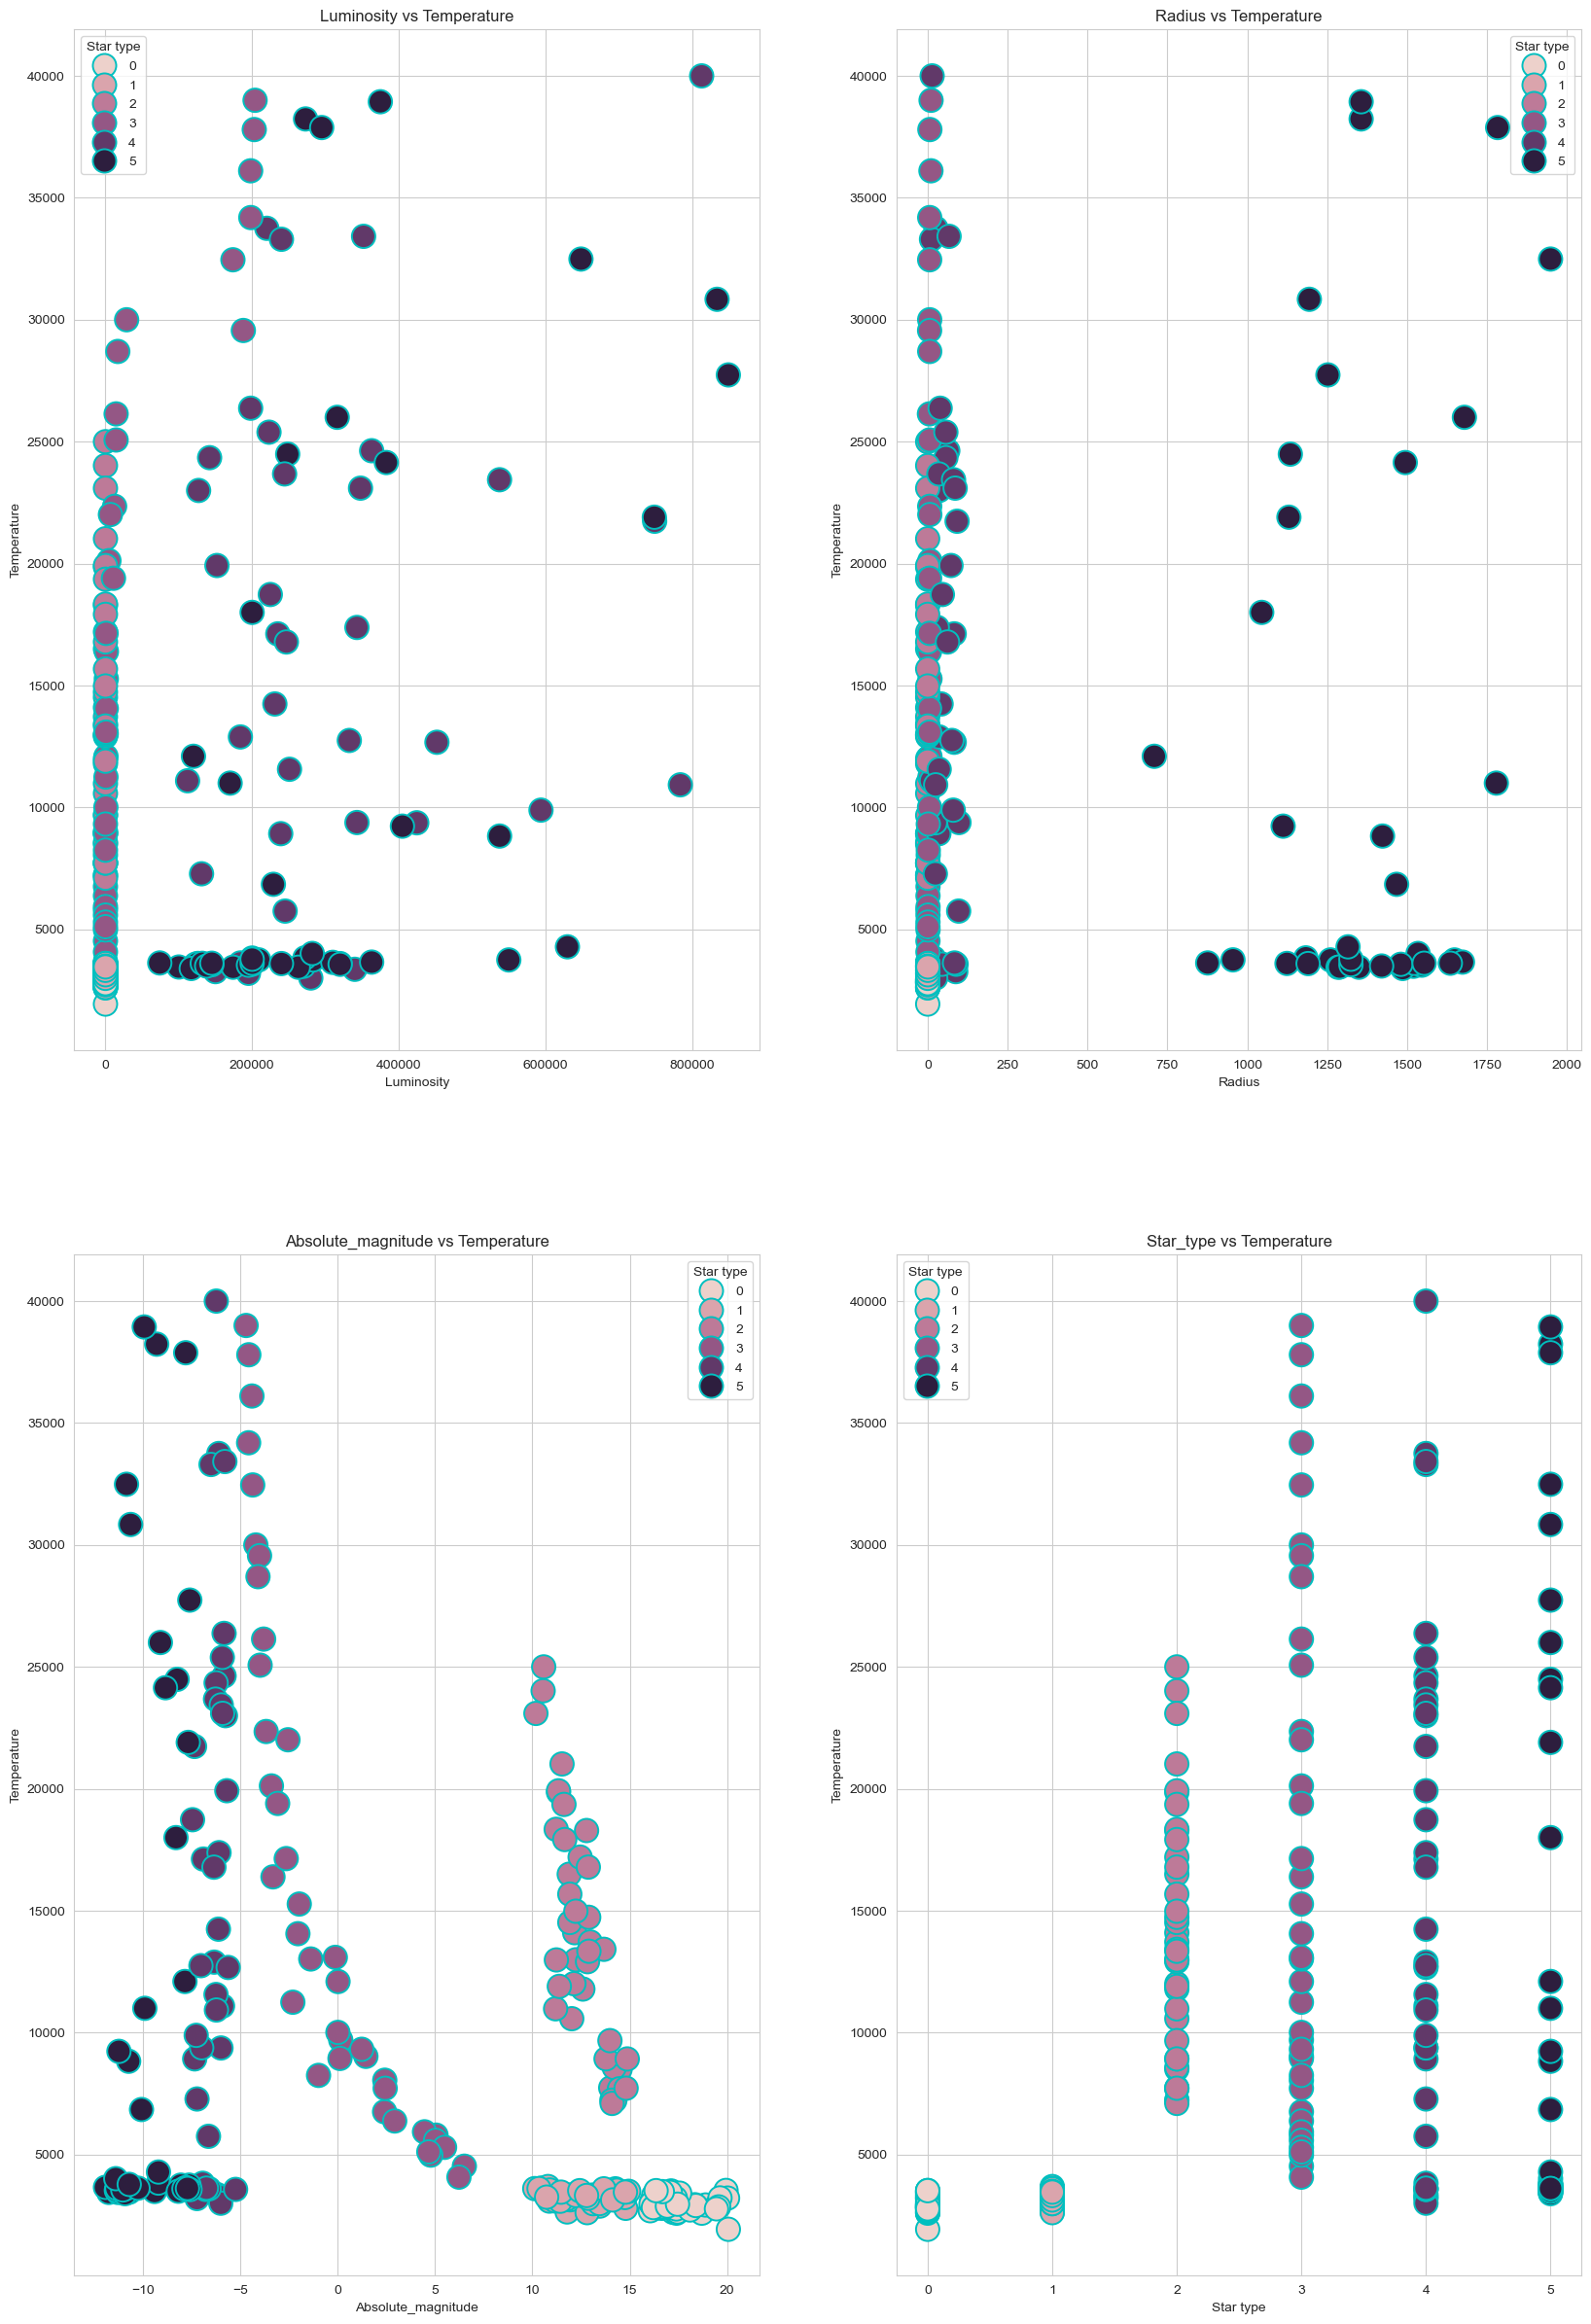

In [32]:
# Suplots of numeric features v price
sns.set_style('whitegrid')
f, axes = plt.subplots(2, 2, figsize=(20, 30))

# Plot [0,0]
sns.scatterplot(x='Luminosity', y='Temperature', hue='Star type', data=data, ax=axes[0, 0], edgecolor='c', s=300)
axes[0, 0].set_xlabel('Luminosity')
axes[0, 0].set_ylabel('Temperature')
axes[0, 0].set_title('Luminosity vs Temperature')

# Plot [0,1]
sns.scatterplot(x='Radius', y='Temperature', hue='Star type', data=data, ax=axes[0, 1], edgecolor='c', s=300)
axes[0, 1].set_xlabel('Radius')
axes[0, 1].set_ylabel('Temperature')
axes[0, 1].set_title('Radius vs Temperature')

# Plot [1,0]
sns.scatterplot(x='Absolute_magnitude', y='Temperature', hue='Star type', data=data, ax=axes[1, 0], edgecolor='c', s=300)
axes[1, 0].set_xlabel('Absolute_magnitude')
axes[1, 0].set_ylabel('Temperature')
axes[1, 0].set_title('Absolute_magnitude vs Temperature')

# Plot [1,1]
sns.scatterplot(x='Star type', y='Temperature', hue='Star type', data=data, ax=axes[1, 1], edgecolor='c', s=300)
axes[1, 1].set_xlabel('Star type')
axes[1, 1].set_ylabel('Temperature')
axes[1, 1].set_title('Star_type vs Temperature')

# Show the plot
plt.legend(title='Star type')
plt.show()



##### Выводы:

* звезды самой низкой светимости имеют тип от 0 до 3

* наименьший радиус имеют также типы от 0-3 

* абсолютная величина звезд со знаком минус характерна для звезд 4,5 типов. А вот самую большую абсолютную величину имеют звезды 0-3 типа, но у них же самая низкая температура

**Temperature (K)** целевой признак, показывающий температуру на поверхности звезды. Распределение имеет длинный правый хвост. 


mu = 10497.46 and sigma = 9532.50



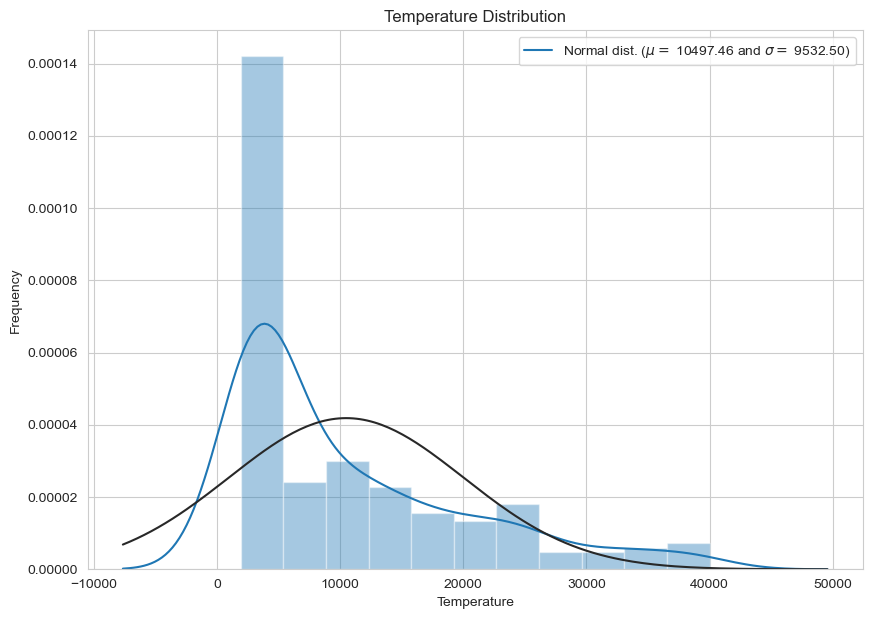

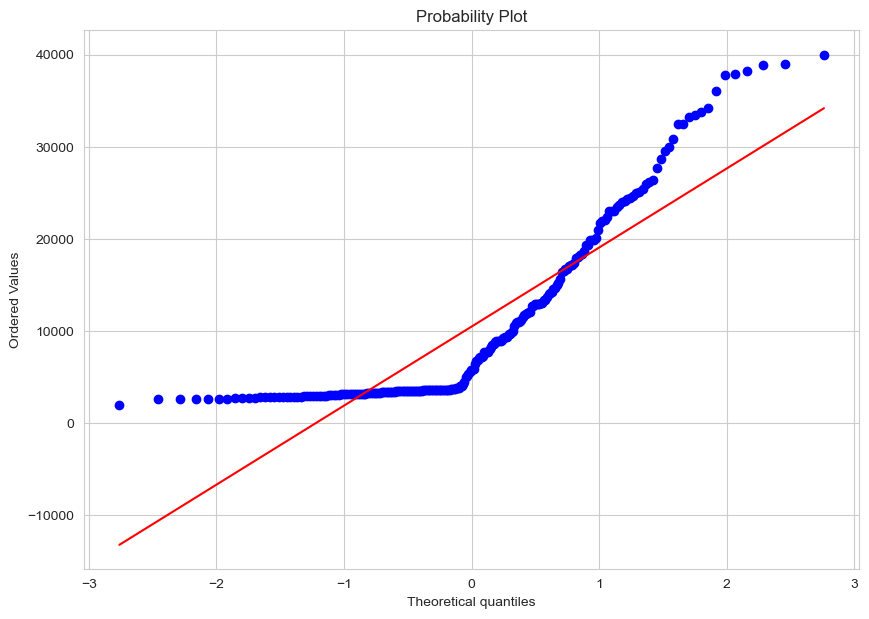

In [33]:
# Задаем размер фигуры до построения графика
plt.figure(figsize=(10, 7))

# Построение распределения без аргумента 'figsize'
sns.distplot(data['Temperature'], fit=norm, kde=True, hist=True)

# Получение параметров нормального распределения
(mu, sigma) = norm.fit(data['Temperature'])
print('\nmu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Добавление легенды с параметрами
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)],
           loc='best')

plt.ylabel('Frequency')
plt.title('Temperature Distribution')

# Построение QQ-графика
fig = plt.figure(figsize=(10, 7))
res = stats.probplot(data['Temperature'], plot=plt)

plt.show()

QQ-plot подтвердил, что целевой признак не имеет нормального распределения. Проверим на нормальность остальные числовые признаки, для этого будем использовать статистический метод: Shapiro-Wilk Test

<h2 class="list-group-item list-group-item-action active">Normality Tests</h2>
<p> Основной целью выполнения тестов на нормальность является проверка гауссовского распределения данных. </p>
<h3 class="alert alert-info">Shapiro-Wilk Test</h3>
Проверяет, имеет ли выборка данных гауссово распределение.

<div class="alert alert-info">Предположения</div>
 Все признаки независимы и распределены одинаково.
<div class="alert alert-info">Гипотезы</div>


* H0: Признак имеет нормальное распределение (Gaussian distribution).
* H1: Признак не имеет нормального распределения.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html" class="btn btn-warning" role="button">Scipy Ref -></a>

In [34]:
from scipy.stats import shapiro
data_1 = data['Luminosity']
stat, p = shapiro(data_1)
print('stat={0:.3f}, p={0:.3f}' .format(stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.660, p=0.660
Probably not Gaussian


In [35]:
data_2 = data['Radius']
stat_2, p_2 = shapiro(data_2)
print('stat={0:.3f}, p={0:.3f}' .format(stat_2, p_2))
if p_2 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.502, p=0.502
Probably not Gaussian


In [36]:
data_3 = data['Absolute_magnitude']
stat_3, p_3 = shapiro(data_3)
print('stat={0:.3f}, p={0:.3f}' .format(stat_3, p_3))
if p_3 > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.869, p=0.869
Probably not Gaussian


Наша гипотеза о том, что все наши числовые признаки распределены нормально не подтвердилась.Это говорит о том, что в дальнейшем для достижения оптимального результата нам понадобится нормализовать наши числовые признаки.

Сгенерируем новый признак: категории типов звезд в соответствии с условиями ТЗ. И продолжим изучение признаков.

In [37]:
def categorize_Star_type(i):
    if i == 0:
        return 'Коричневый карлик'
    if i == 1:
        return 'Красный карлик'
    if i == 2:
        return 'Белый карлик'
    if i == 3:
        return 'Звёзды главной последовательности'
    if i == 4:
        return 'Сверхгигант'
    return 'Гипергигант'

In [38]:
data['category_Star_type'] =data['Star type'].apply(categorize_Star_type)
data.head()

Temperature  Luminosity  Radius  Absolute_magnitude  Star type Star_color  \
0         3068    0.002400  0.1700           16.120001          0        Red   
1         3042    0.000500  0.1542           16.600000          0        Red   
2         2600    0.000300  0.1020           18.700001          0        Red   
3         2800    0.000200  0.1600           16.650000          0        Red   
4         1939    0.000138  0.1030           20.059999          0        Red   

  category_Star_type  
0  Коричневый карлик  
1  Коричневый карлик  
2  Коричневый карлик  
3  Коричневый карлик  
4  Коричневый карлик

Посмотрим на соотношение таргета и категориальных признаков

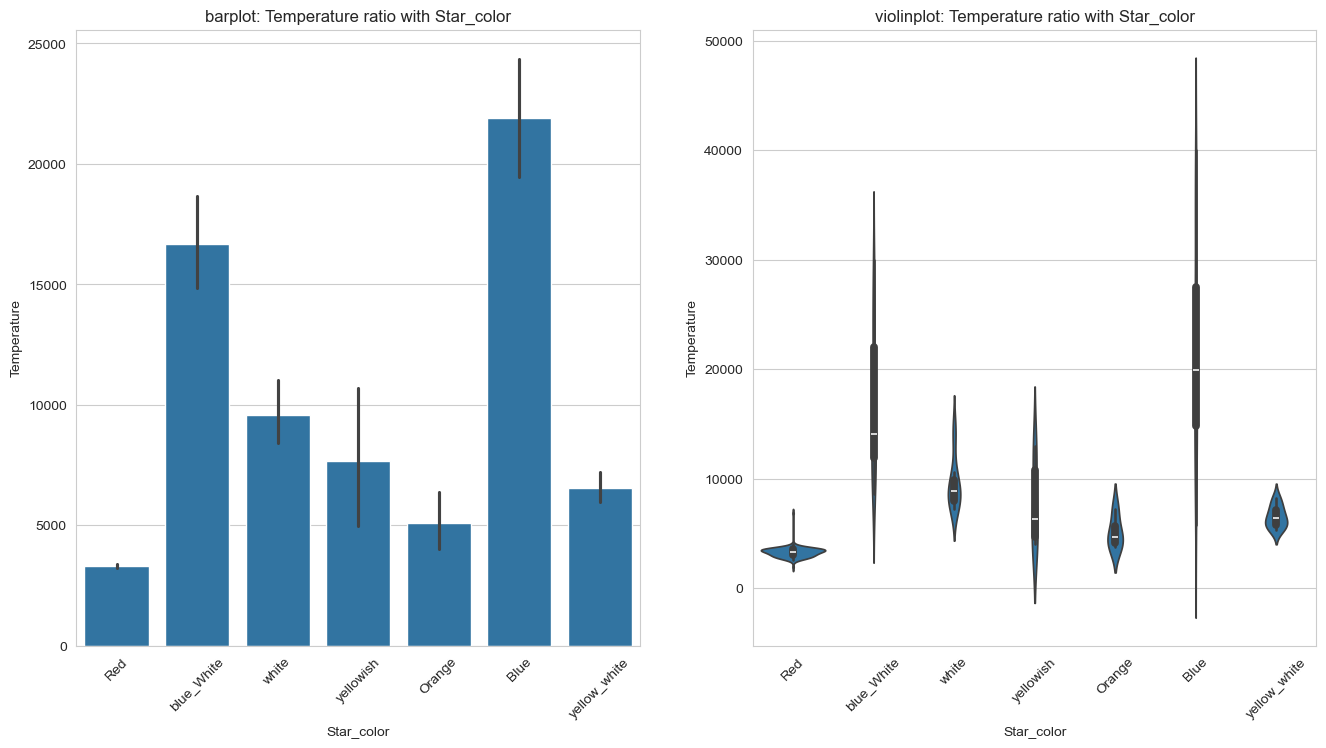

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title('barplot: Temperature ratio with Star_color')
barplot = sns.barplot(x=data['Star_color'], y=data['Temperature'], ax=ax[0])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

ax[1].set_title('violinplot: Temperature ratio with Star_color')
violinplot = sns.violinplot(x=data['Star_color'], y=data['Temperature'], ax=ax[1])
violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=45)

plt.show()

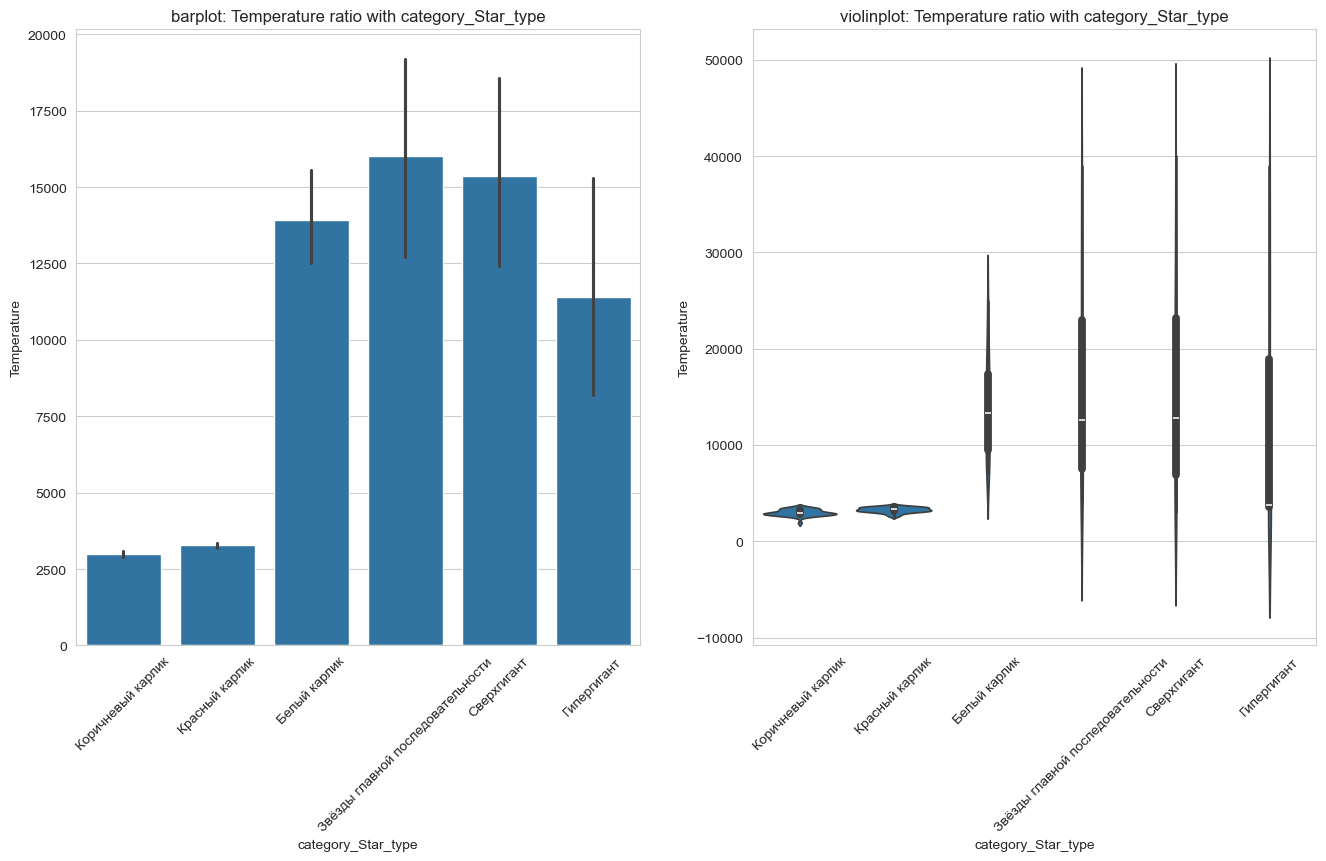

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
ax[0].set_title('barplot: Temperature ratio with category_Star_type')
barplot = sns.barplot(x=data['category_Star_type'], y=data['Temperature'], ax=ax[0])
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45)

ax[1].set_title('violinplot: Temperature ratio with category_Star_type')
violinplot = sns.violinplot(x=data['category_Star_type'], y=data['Temperature'], ax=ax[1])
violinplot.set_xticklabels(violinplot.get_xticklabels(), rotation=45)

plt.show()

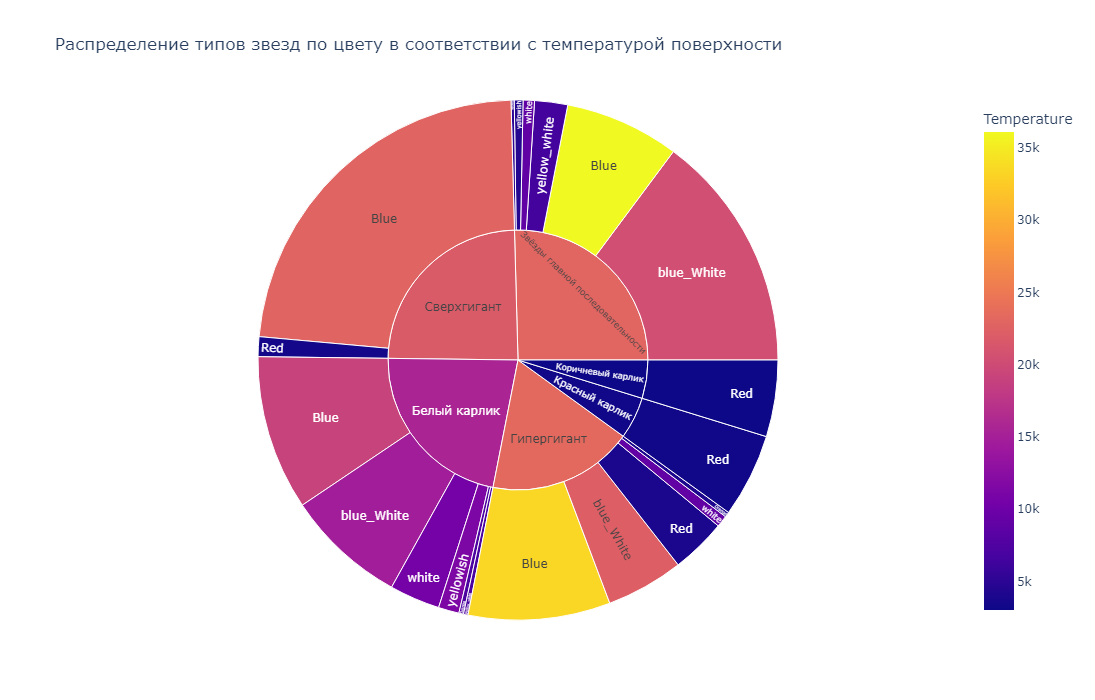

In [41]:
df = data
fig = px.sunburst(df, path=['category_Star_type', 'Star_color'], values='Temperature',
                  color='Temperature', title='Распределение типов звезд по цвету в соответствии с температурой поверхности', width=1000,    # Ширина графика в пикселях
    height=700)
fig.show()

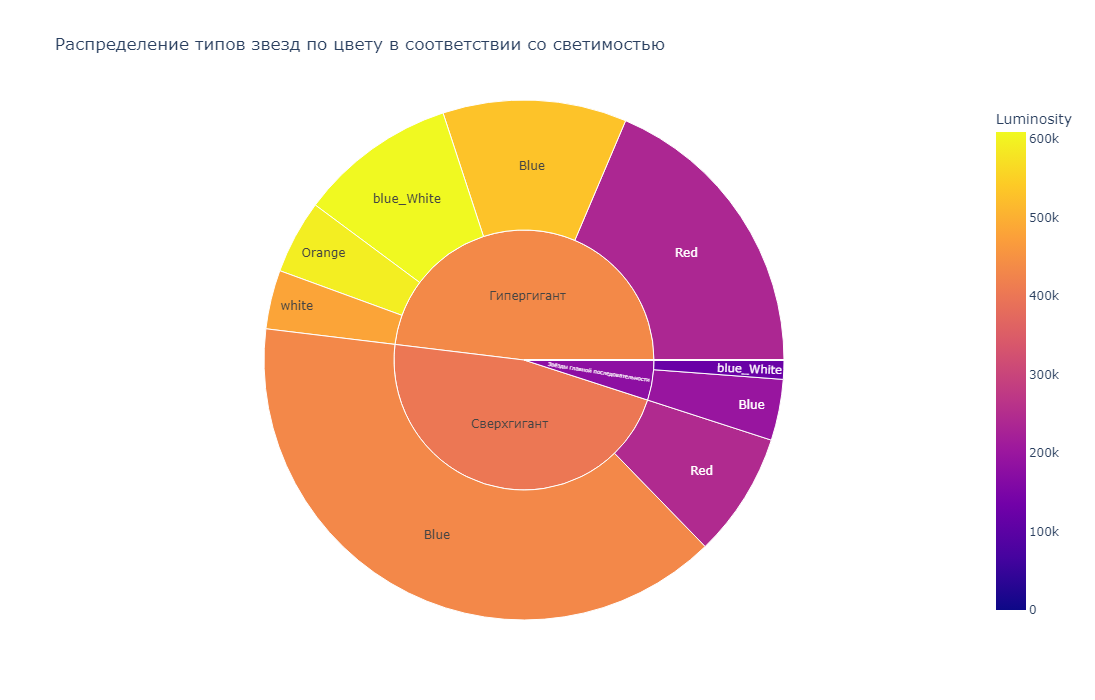

In [42]:
df_1 = data
fig = px.sunburst(df_1, path=['category_Star_type', 'Star_color'], values='Luminosity',
                  color='Luminosity', title='Распределение типов звезд по цвету в соответствии со светимостью', width=1000,    # Ширина графика в пикселях
    height=700)
fig.show()

##### Выводы:

* Приведенные графики еще раз подтвердили, что признаки не имеют нормального распределения. 
* Присутствуют выбросы, но их значение не превышает 2,5%, поэтому проведение какой-то дополнительной работы с ними не требуется. 
* Наибольшее количество звезд имеет температуру до 5000, относительная светимость для большинства звезд составляет до 50000, 
* радиус большинства звезд колеблется до 100, 
* абсолютная звездная величина представлена двумя диапазонами: от -5 до -10, от 10-20. 
* Абсолютно все звезды с большим диаметром: сверхгиганты и гипергиганты имеют низкую меру светимости по отношению к звездам меньшего радиуса, и имеют температуру поверхности как низкую так и высокую. 
* Наибольшее количество звезд в представленом датасете имеет синий цвет, 
* по типу звезды представлены равномерно. 
* Наибольшую температуру поверхности имеют синие звезды главной последовательности, 
* самую низкую ткмпературу поверхности имеют красные звезды, причем размер может быть разным: низкую температуру могут иметь и гипергиганты и карлики. А вот светимость звезд, мощность излучения зависит от радиуса звезды, наибольшие значения светимости характерны для сине-белых и оранжевых гипергигантов. 

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Корреляционный анализ данных
    
</div>

In [43]:
corr_matrix_df = data.phik_matrix(interval_cols=['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude'])
corr_matrix_df.round(2)

Temperature  Luminosity  Radius  Absolute_magnitude  \
Temperature                1.00        0.56    0.24                0.93   
Luminosity                 0.56        1.00    0.57                0.68   
Radius                     0.24        0.57    1.00                1.00   
Absolute_magnitude         0.93        0.68    1.00                1.00   
Star type                  0.60        0.65    0.64                0.96   
Star_color                 0.72        0.43    0.09                0.00   
category_Star_type         0.60        0.65    0.64                0.96   

                    Star type  Star_color  category_Star_type  
Temperature              0.60        0.72                0.60  
Luminosity               0.65        0.43                0.65  
Radius                   0.64        0.09                0.64  
Absolute_magnitude       0.96        0.00                0.96  
Star type                1.00        0.67                1.00  
Star_color               0.67        1.00                0.67  
category_Star_type       1.00        0.67                1.00

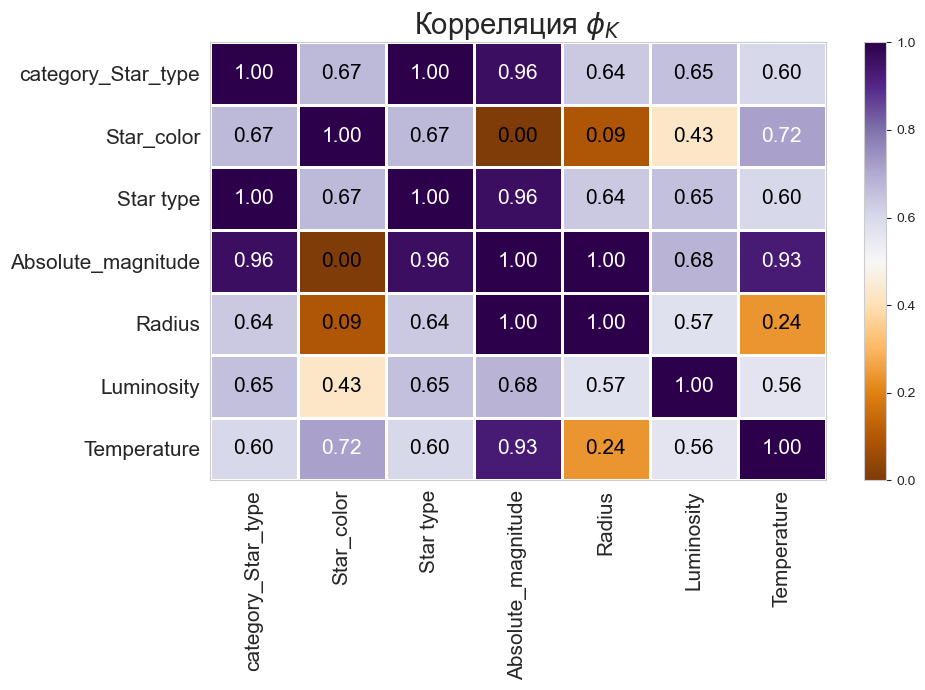

In [44]:
plot_correlation_matrix(
    corr_matrix_df.values,
    x_labels=corr_matrix_df.columns,
    y_labels=corr_matrix_df.index,
    vmin=0, vmax=1, color_map='PuOr',
    title=r'Корреляция $\phi_K$',
    fontsize_factor=1.5,
    figsize=(10, 7)
)

Выведем статистическую значимость каждого признака

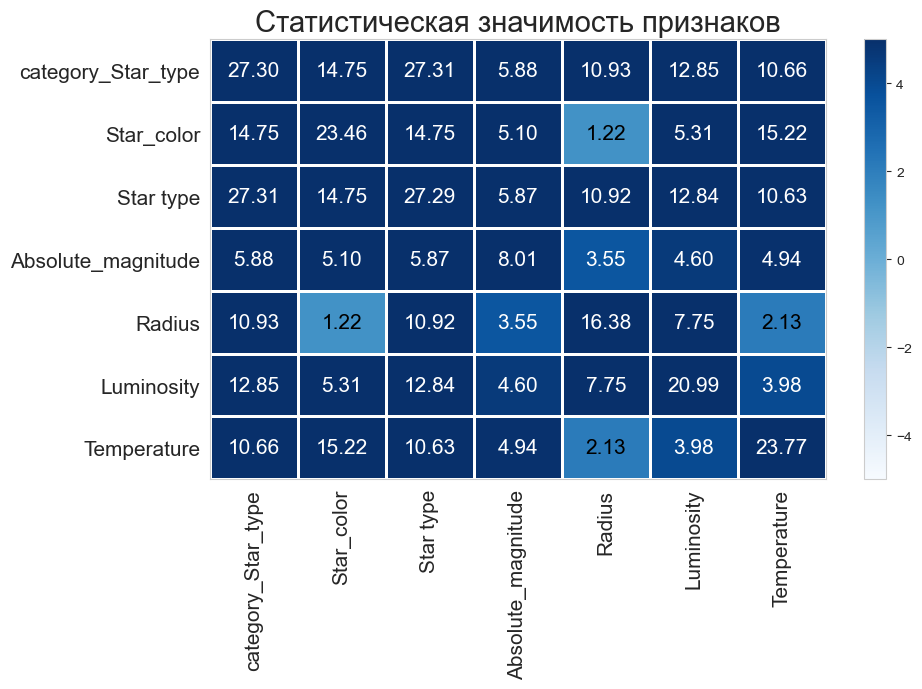

In [45]:
significance_overview = data.significance_matrix(interval_cols=['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude', 'Star_type'])
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Статистическая значимость признаков", 
                        usetex=False, fontsize_factor=1.5, figsize=(10, 7), color_map="Blues")
plt.tight_layout()

##### Выводы:



Проведенный корреляционный анализ подтвердил, что все наши признаки так или иначе влияют на таргет и имеют связь друг с другом. Поэтому оставляем все признаки кроме Star type для обучения нейросети.

In [46]:
data = data.drop([
    'Star type'
], axis=1)

In [47]:
data_all = data.copy()

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Подготовка к моделированию
    
</div>

In [48]:
data_all.columns

Index(['Temperature', 'Luminosity', 'Radius', 'Absolute_magnitude',
       'Star_color', 'category_Star_type'],
      dtype='object')

In [49]:
features_num = [ 'Luminosity', 'Radius', 'Absolute_magnitude']
features_cat = ['Star_color', 'category_Star_type']

In [50]:
target = data_all['Temperature']
X_train, X_test, y_train_, y_test_ = train_test_split(
    data_all.drop(columns=['Temperature'], axis=1),
    target,
    test_size=0.1,
    shuffle=True, random_state=42, stratify=data_all['Star_color'])


In [51]:
X_train

Luminosity     Radius  Absolute_magnitude  Star_color  \
42   150000.000000    88.0000           -6.020000         Red   
18        0.003620     0.1967           13.530000         Red   
84        0.000670     0.0089           12.170000  blue_White   
168  342900.000000    30.0000           -6.090000        Blue   
181       0.000631     0.1160           18.389999         Red   
..             ...        ...                 ...         ...   
185       0.000352     0.0973           16.930000         Red   
179  248490.000000  1134.5000           -8.240000  blue_White   
23        0.000500     0.0100           14.500000       white   
218     883.000000     5.6530           -2.640000  blue_White   
119  200000.000000  1324.0000          -10.700000         Red   

                    category_Star_type  
42                         Сверхгигант  
18                      Красный карлик  
84                        Белый карлик  
168                        Сверхгигант  
181                  Коричневый карлик  
..                                 ...  
185                  Коричневый карлик  
179                        Гипергигант  
23                        Белый карлик  
218  Звёзды главной последовательности  
119                        Гипергигант  

[216 rows x 5 columns]

In [52]:
X_test

Luminosity      Radius  Absolute_magnitude    Star_color  \
5         0.000650     0.11000           16.980000           Red   
150  188000.000000     6.02000           -4.010000    blue_White   
191       0.002400     0.46000           10.730000           Red   
158     998.000000     6.21000           -1.380000    blue_White   
129       0.000437     0.08560           18.090000           Red   
22        0.000170     0.01100           14.230000         white   
221  332520.000000    76.00000           -7.020000          Blue   
3         0.000200     0.16000           16.650000           Red   
132       0.008000     0.31000           11.170000           Red   
176  200000.000000  1045.00000           -8.300000          Blue   
92        0.085000     0.79500            6.228000     yellowish   
68        0.000360     0.11800           17.389999           Red   
233  849420.000000  1252.00000           -7.590000    blue_White   
57   174000.000000  1284.00000          -11.280000           Red   
1         0.000500     0.15420           16.600000           Red   
209       0.001250     0.00998           11.620000          Blue   
83        0.000980     0.01500           12.450000    blue_White   
80        0.000290     0.01200           14.090000  yellow_white   
71        0.022000     0.38000           10.120000           Red   
141       0.001500     0.01120           11.520000          Blue   
231  272830.000000  1356.00000           -9.290000          Blue   
75        0.001000     0.35000           11.760000           Red   
56   363000.000000  1673.00000          -11.920000           Red   
103  235000.000000    83.00000           -6.890000          Blue   

                    category_Star_type  
5                    Коричневый карлик  
150  Звёзды главной последовательности  
191                     Красный карлик  
158  Звёзды главной последовательности  
129                  Коричневый карлик  
22                        Белый карлик  
221                        Сверхгигант  
3                    Коричневый карлик  
132                     Красный карлик  
176                        Гипергигант  
92   Звёзды главной последовательности  
68                   Коричневый карлик  
233                        Гипергигант  
57                         Гипергигант  
1                    Коричневый карлик  
209                       Белый карлик  
83                        Белый карлик  
80                        Белый карлик  
71                      Красный карлик  
141                       Белый карлик  
231                        Гипергигант  
75                      Красный карлик  
56                         Гипергигант  
103                        Сверхгигант

In [53]:
y_train_

42      3270
18      3192
84     14100
168    17383
181     2914
       ...  
185     2889
179    24490
23      8500
218    17140
119     3780
Name: Temperature, Length: 216, dtype: int32

Проведем предварительную обработку данных. Использовать будем OneHotEncoder для категориальных столбцов и MinMaxScaler() для числовых столбцов.

In [54]:

data_preprocessor = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(drop='first', handle_unknown='error'), features_cat),
        ('num', MinMaxScaler(), features_num)
    ],

    remainder='passthrough'
)

In [55]:
# Преобразование обучающих данных
X_processed = data_preprocessor.fit_transform(X_train)

# Преобразование тестовых данных
X_new_processed = data_preprocessor.transform(X_test)

# Получаем имена колонок для нового DataFrame
ohe_columns = data_preprocessor.named_transformers_['ohe'].get_feature_names_out(features_cat)

# Получаем имена столбцов для нового DataFrame
processed_columns = list(features_num) + list(ohe_columns)

# Преобразование обратно в DataFrame для обучающего набора


X_processed_df = pd.DataFrame(X_processed, columns=processed_columns)

# Преобразуем обратно в DataFrame для тестового набора
X_new_processed_df = pd.DataFrame(X_new_processed, columns=processed_columns)

# Вывод результата
print("Обработанный обучающий набор:")
print(X_processed_df.head())

print("\nОбработанный тестовый набор:")
print(X_new_processed_df.head())

# Подготовка целевых переменных
y_train = y_train_.values.flatten()
y_test = y_test_.values.flatten()

# Масштабирование данных
scaler = StandardScaler()
X_processed_scaled = scaler.fit_transform(X_processed_df)
X_new_processed_scaled = scaler.transform(X_new_processed_df)

# Переводим данные в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_processed_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_new_processed_scaled)
y_test_tensor = torch.FloatTensor(y_test)
 

Обработанный обучающий набор:
   Luminosity  Radius  Absolute_magnitude  Star_color_Orange  Star_color_Red  \
0         0.0     1.0                 0.0                0.0             0.0   
1         0.0     1.0                 0.0                0.0             0.0   
2         0.0     0.0                 1.0                0.0             0.0   
3         0.0     0.0                 0.0                0.0             0.0   
4         0.0     1.0                 0.0                0.0             0.0   

   Star_color_blue_White  Star_color_white  Star_color_yellow_white  \
0                    0.0               0.0                      0.0   
1                    0.0               0.0                      0.0   
2                    0.0               0.0                      0.0   
3                    0.0               0.0                      0.0   
4                    0.0               0.0                      0.0   

   Star_color_yellowish  category_Star_type_Гипергигант  \
0  

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Подготовка базовой модели
    
</div>

In [56]:
%time
class NeuralNetwork(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dropout = nn.Dropout(0.5)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)
        
        


    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

CPU times: total: 0 ns
Wall time: 0 ns


In [57]:
n_in_neurons = X_train_tensor.shape[1]
n_hidden_neurons_1 = 128
n_hidden_neurons_2 = 64
n_hidden_neurons_3 = 32
n_out_neurons = 1

net = NeuralNetwork(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons)
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss = nn.MSELoss()

Цикл обучения базовой модели. Применим раннюю остановку для избегания переобучения нейросети

In [58]:
dataset_train = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
dataset_test = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

train_dataloader = DataLoader(dataset_train, batch_size=50, shuffle=True,
                              num_workers=0)
test_dataloader = DataLoader(dataset_test, batch_size=50, num_workers=0) 

Применим метод ранней остановки, чтобы избежать переобучения модели

Обучим базовую модель

In [59]:
%time
batch_size = 100
num_epochs = 100001
patience = 10

best_rmse = float('inf')
epochs_without_improvement = 0

for epoch in range(num_epochs):
    net.train()  # Set to training mode
    optimizer.zero_grad()
    
    preds = net(X_train_tensor).flatten()
    loss_value = loss(preds, y_train_tensor)
    loss_value.backward()
    optimizer.step()

    if epoch % 20 == 0 or epoch == num_epochs - 1:
        net.eval()  # Set to evaluation mode
        with torch.no_grad():  # No need to track gradients
            y_train_pred = net(X_train_tensor).flatten()
            y_test_pred = net(X_test_tensor).flatten()

        train_rmse = np.sqrt(mean_squared_error(y_train_tensor.numpy(), y_train_pred.numpy()))
        test_rmse = np.sqrt(mean_squared_error(y_test_tensor.numpy(), y_test_pred.numpy()))

        print(f"Epoch {epoch}: Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
        
        if test_rmse < best_rmse:
            best_rmse = test_rmse
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print("Early stopping triggered.")
            print(f'Best RMSE test: {best_rmse:.4f}')
            break

CPU times: total: 0 ns
Wall time: 0 ns
Epoch 0: Train RMSE: 14086.3984, Test RMSE: 14992.8428
Epoch 20: Train RMSE: 14084.9678, Test RMSE: 14991.3857
Epoch 40: Train RMSE: 14077.7812, Test RMSE: 14984.0596
Epoch 60: Train RMSE: 14049.7891, Test RMSE: 14955.3818
Epoch 80: Train RMSE: 13965.7188, Test RMSE: 14869.0068
Epoch 100: Train RMSE: 13755.9023, Test RMSE: 14653.6875
Epoch 120: Train RMSE: 13311.6367, Test RMSE: 14197.9658
Epoch 140: Train RMSE: 12499.0908, Test RMSE: 13362.5977
Epoch 160: Train RMSE: 11213.3086, Test RMSE: 12042.6816
Epoch 180: Train RMSE: 9519.2168, Test RMSE: 10302.5469
Epoch 200: Train RMSE: 7877.6846, Test RMSE: 8591.2422
Epoch 220: Train RMSE: 6965.1885, Test RMSE: 7558.2461
Epoch 240: Train RMSE: 6652.6860, Test RMSE: 7169.7134
Epoch 260: Train RMSE: 6459.3047, Test RMSE: 6992.8433
Epoch 280: Train RMSE: 6295.7207, Test RMSE: 6838.2632
Epoch 300: Train RMSE: 6151.0732, Test RMSE: 6676.4297
Epoch 320: Train RMSE: 6017.4126, Test RMSE: 6510.2896
Epoch 340: Tr

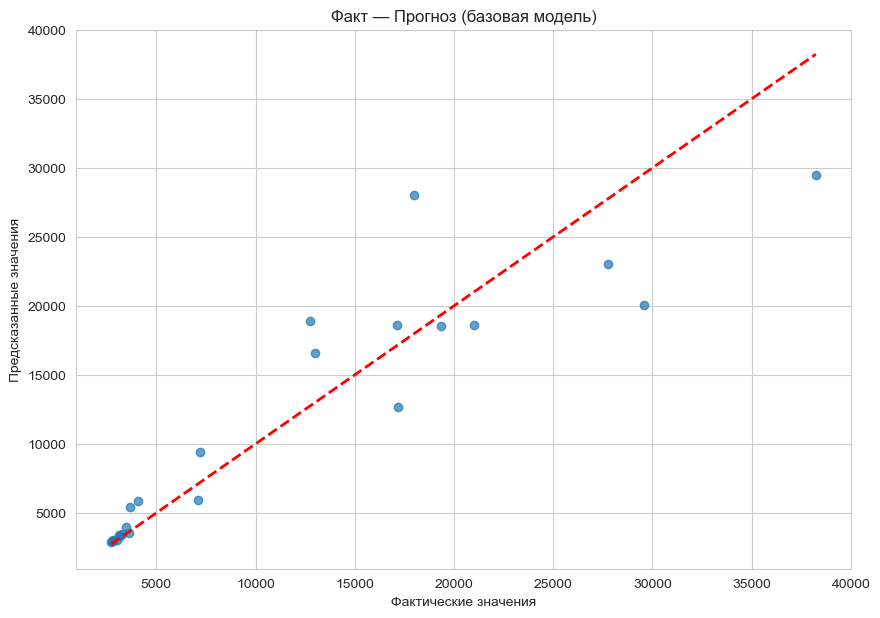

In [60]:
# График "Факт — Прогноз"
plt.figure(figsize=(10, 7))
plt.scatter(y_test_tensor, y_test_pred, alpha=0.7)
plt.plot([y_test_tensor.min(), y_test_tensor.max()], [y_test_tensor.min(), y_test_tensor.max()], 'r--', lw=2)
plt.title("Факт — Прогноз (базовая модель)")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.show()

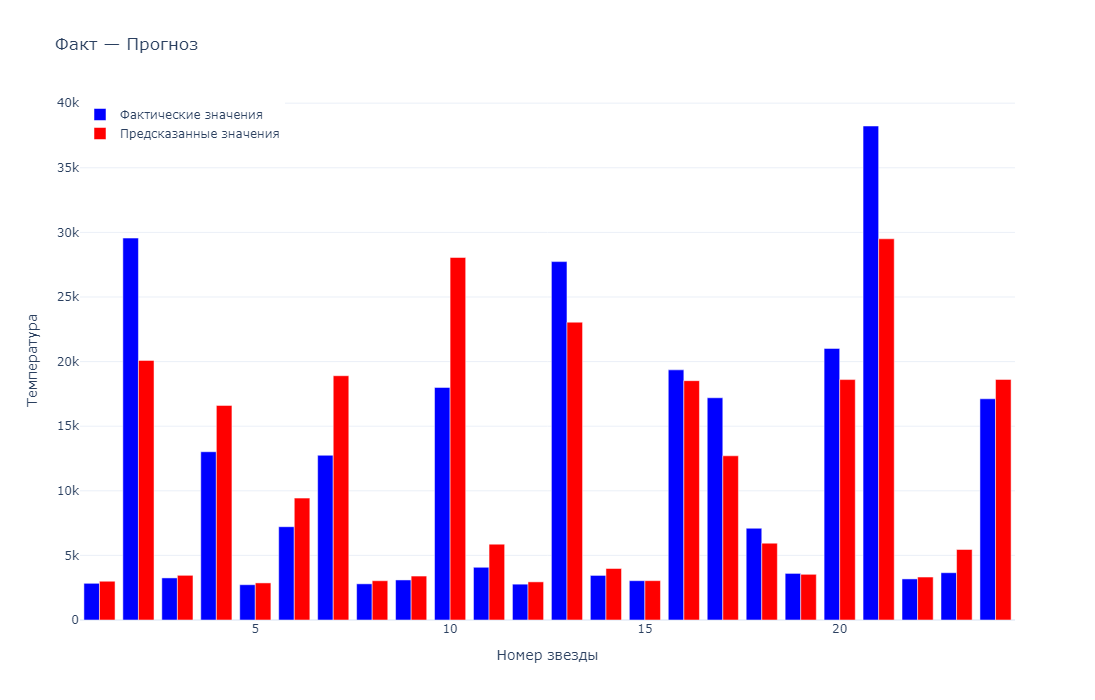

In [61]:
results_df = pd.DataFrame({
    'Actual': y_test_tensor[:50],
    'Predicted': y_test_pred.flatten()[:50]
})

# Создаём список индексов от 1 до 20 для оси X
indices = list(range(1, len(results_df) + 1))

# Создание графика с помощью Plotly
fig = go.Figure()

# Добавление фактических значений
fig.add_trace(go.Bar(
    x=indices,
    y=results_df['Actual'],
    name='Фактические значения',
    marker=dict(color='blue')
))

# Добавление предсказанных значений
fig.add_trace(go.Bar(
    x=indices,
    y=results_df['Predicted'],
    name='Предсказанные значения',
    marker=dict(color='red')
))

# Добавление настроек графика, включая размеры
fig.update_layout(
    title='Факт — Прогноз',
    xaxis_title='Номер звезды',
    yaxis_title='Температура',
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,    # Ширина графика в пикселях
    height=700,    # Высота графика в пикселях
    barmode='group' # Размещение столбцов рядом для лучшего сравнения
)

# Отображение графика
fig.show()

Мы получили неплохой результат на простейшей нейросети. Видно, что наилучшим образом наша нейросеть работает с температурой до 15000 К. 

**Это типы звезд:**

1. Красный карлик, 
2. коричневый карлик, 
3. часть звезд главной последовательности (цвета от бело-желтого до оранжевого), 
4. супергигант цвета red.
5. белый карлик цвета от белого до оранжевого.

Более высокие значения вызывают у модели трудности, что вызвано небольшим количеством звезд с более высокой температурой, модель просто не может качественно на этих признаках обучиться.

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Подбор гиперпараметров
    
</div>

Для улучшения качества работы модели будем использовать несколько моментов, которые могут повлиять на работу модели и посмотрим результат:

* Инициализация optimizer : [torch.optim.Adam]

* Длительность обучения, параметр epochs оставляем прежним

* Ранняя остановка для избежания переобучения модели, уменьшим параметр patience (сколько эпох ждать, прежде чем остановиться, когда потеря не улучшается)

* Применим BatchNorm1d (не просто подсчёт статистик и нормализация, но ещё и обучение параметров)

* уменьшим параметр Dropout (это ещё одна техника регуляризации. На русский язык её название обычно не переводят и называют «дропаут» Она основана на очень простой, но рабочей идее: «выключить» часть нейронов сети)



In [62]:
class ImprovedNeuralNetwork_(nn.Module):
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output, dropout_rate):
        super(ImprovedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)  # Batch Normalization
        self.dropout1 = nn.Dropout(dropout_rate)
        self.activation_function = activation_function
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)  # Batch Normalization
        self.dropout2 = nn.Dropout(dropout_rate)
        self.activation_function = activation_function
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.activation_function = activation_function
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)

        

    def forward(self, x):
        if self.activation_function == 'ReLU':
            x = F.relu(self.bn1(self.fc1(x)))
        elif self.activation_function == 'Sigmoid':
            x = torch.sigmoid(self.bn1(self.fc1(x)))
        elif self.activation_function == 'Tanh':
            x = torch.tanh(self.bn1(self.fc1(x)))

        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = F.relu(self.fc3(x))  # Применяем ReLU перед выходным слоем
        x = self.fc4(x)
        return x

In [63]:
class ImprovedNeuralNetwork(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons, dropout_rate, activation_function_2='ReLU', activation_function_3='ReLU'):
        super(ImprovedNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.bn1 = nn.BatchNorm1d(n_hidden_neurons_1)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.bn2 = nn.BatchNorm1d(n_hidden_neurons_2)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)

        self.activation_function_2 = activation_function_2
        self.activation_function_3 = activation_function_3

    def forward(self, x):
        x = self.bn1(self.fc1(x))
        x = self.apply_activation(x, self.activation_function_2)
        x = self.dropout1(x)

        x = self.bn2(self.fc2(x))
        x = self.apply_activation(x, self.activation_function_3)
        x = self.dropout2(x)

        x = self.fc3(x)  # Убрали ReLU, если это регрессия
        x = self.fc4(x)
        return x
    
    def apply_activation(self, x, activation_function):
        if activation_function == 'ReLU':
            return F.relu(x)
        elif activation_function == 'ELU':
            return F.elu(x)
        elif activation_function == 'Tanh':
            return torch.tanh(x)
        else:
            return x

In [64]:
def train_model(model, X_train, y_train, epochs, batch_size, optimizer):
    model.train()
    criterion = nn.MSELoss()  # Пример потерь для регрессии

    for epoch in range(epochs):
        permutation = torch.randperm(X_train.size(0))  # Перемешиваем данные
        for i in range(0, X_train.size(0), batch_size):
            indices = permutation[i:i + batch_size]
            batch_X, batch_y = X_train[indices], y_train[indices]

            optimizer.zero_grad()  # Обнуляем градиенты
            outputs = model(batch_X)  # Прямой проход
            loss = criterion(outputs.view(-1), batch_y)  # Вычисляем потери
            loss.backward()  # Обратный проход
            optimizer.step()  # Обновляем веса 

In [65]:
%time
import optuna
def objective(trial):
    # Гиперпараметры
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 100])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-5, 1e-2)  # Л2-регуляризация
    activation_function = trial.suggest_categorical('activation_function', ['ReLU', 'ELU', 'Tanh'])
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam', 'RMSprop'])

    kf = KFold(n_splits=5, shuffle=True, random_state=45)
    fold_rmse = []

    for train_index, val_index in kf.split(X_processed_scaled):
        X_train_fold = torch.FloatTensor(X_processed_scaled[train_index])
        y_train_fold = torch.FloatTensor(y_train[train_index])
        X_val_fold = torch.FloatTensor(X_processed_scaled[val_index])
        y_val_fold = torch.FloatTensor(y_train[val_index])

        # Создание модели
        model = ImprovedNeuralNetwork(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons,
                                      dropout_rate=dropout_rate, activation_function_2=activation_function,
                                      activation_function_3=activation_function)

        
        # Выбор оптимизатора
        if optimizer_name == 'Adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        elif optimizer_name == 'RMSprop':
            optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

        # Ранняя остановка
        patience = 10
        best_rmse = float('inf')
        epochs_without_improvement = 0
        
        for epoch in range(1000):  # Задайте максимальное количество эпох
            train_model(model, X_train_fold, y_train_fold, epochs=1, batch_size=batch_size, optimizer=optimizer)  # Передаем оптимизатор
            
            # Оценка на валидационном наборе
            model.eval()
            with torch.no_grad():
                y_val_pred = model(X_val_fold).numpy()


            # Вычисляем RMSE для валидации
            val_rmse = np.sqrt(mean_squared_error(y_val_fold.numpy(), y_val_pred))
            
            if val_rmse < best_rmse:
                best_rmse = val_rmse
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1

            if epochs_without_improvement >= patience:
                break  # Прекращаем обучение при отсутствии улучшения

        fold_rmse.append(best_rmse)

    # Возвращаем среднее значение RMSE по всем фолдам для текущей комбинации гиперпараметров
    return np.mean(fold_rmse)

# Оптимизация гиперпараметров с использованием Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Получение лучших гиперпараметров
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

[I 2024-09-18 17:05:24,604] A new study created in memory with name: no-name-496b32cd-06c1-4963-9255-6d1a58de0a85


CPU times: total: 0 ns
Wall time: 0 ns


[I 2024-09-18 17:05:26,319] Trial 0 finished with value: 4344.53662109375 and parameters: {'dropout_rate': 0.28024723870372986, 'batch_size': 64, 'learning_rate': 0.01156352342005271, 'weight_decay': 0.00023472779626083483, 'activation_function': 'ELU', 'optimizer': 'RMSprop'}. Best is trial 0 with value: 4344.53662109375.
[I 2024-09-18 17:05:35,734] Trial 1 finished with value: 4492.05517578125 and parameters: {'dropout_rate': 0.29875582564457914, 'batch_size': 32, 'learning_rate': 0.0016533010193422206, 'weight_decay': 2.039464224785273e-05, 'activation_function': 'ELU', 'optimizer': 'RMSprop'}. Best is trial 0 with value: 4344.53662109375.
[I 2024-09-18 17:05:47,739] Trial 2 finished with value: 14063.380859375 and parameters: {'dropout_rate': 0.4249865125873975, 'batch_size': 64, 'learning_rate': 1.0805265251259367e-05, 'weight_decay': 0.0008189066736291849, 'activation_function': 'ReLU', 'optimizer': 'RMSprop'}. Best is trial 0 with value: 4344.53662109375.
[I 2024-09-18 17:06:20,

Best Hyperparameters: {'dropout_rate': 0.17942603916895727, 'batch_size': 32, 'learning_rate': 0.029896585301627556, 'weight_decay': 1.6360163356367197e-05, 'activation_function': 'ReLU', 'optimizer': 'RMSprop'}


In [66]:
%time
# Определение патентности для ранней остановки
patience = 10
best_rmse = float('inf')
epochs_without_improvement = 0



# Обучение модели с лучшими гиперпараметрами на всей обучающей выборке
final_model = ImprovedNeuralNetwork(
    n_in_neurons,
    n_hidden_neurons_1,
    n_hidden_neurons_2,
    n_hidden_neurons_3,
    n_out_neurons,
    dropout_rate=best_params['dropout_rate'],
    activation_function_2=best_params['activation_function'],
    activation_function_3=best_params['activation_function']
)

# Оптимизатор
optimizer_name = best_params['optimizer']
if optimizer_name == 'Adam':
    optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
elif optimizer_name == 'RMSprop':
    optimizer = torch.optim.RMSprop(final_model.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
elif optimizer_name == 'Adagrad':
    optimizer = torch.optim.Adagrad(final_model.parameters(), lr=best_params['learning_rate'], weight_decay=best_params['weight_decay'])
else:
    raise ValueError(f"Unknown optimizer: {optimizer_name}")

# Обучение на всей обучающей выборке с ранней остановкой
for epoch in range(100001):
    # Обучите модель
    train_model(final_model, torch.FloatTensor(X_processed_scaled), torch.FloatTensor(y_train), epochs=1, batch_size=32, optimizer=optimizer)


    # Ранняя остановка
    if train_rmse < best_rmse:
        best_rmse = train_rmse
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Оценка модели на тестовых данных
final_model.eval()
with torch.no_grad():
    y_test_pred_ = final_model(torch.FloatTensor(X_new_processed_scaled)).numpy()  # Замените на ваши тестовые данные
    test_rmse = np.sqrt(mean_squared_error(y_test_tensor, y_test_pred_))  # Замените y_test на ваши целевые значения теста

print(f"Test RMSE: {test_rmse:.4f}")


CPU times: total: 0 ns
Wall time: 0 ns
Early stopping at epoch 10
Test RMSE: 4542.1782


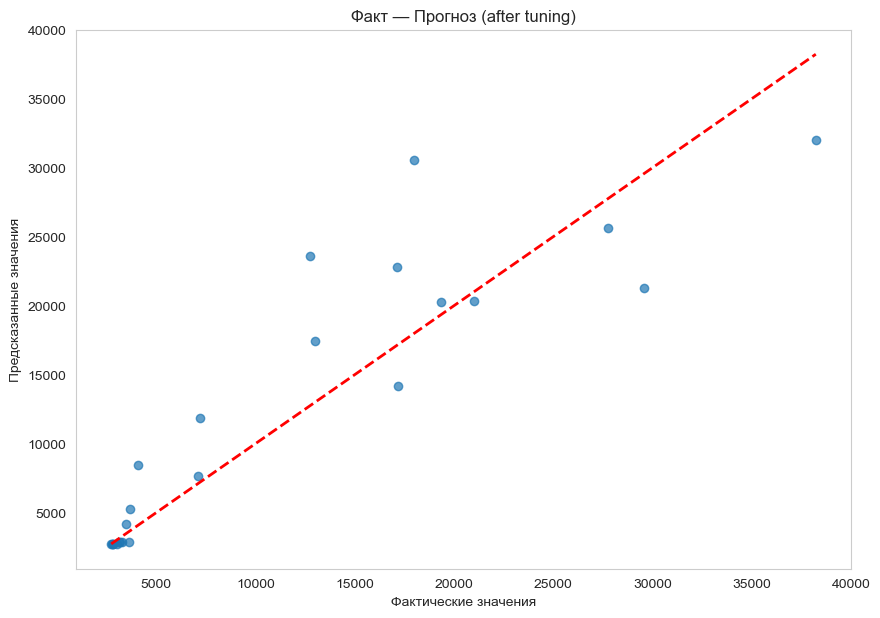

In [67]:
# Создание графика
plt.figure(figsize=(10, 7))
plt.scatter(y_test_tensor, y_test_pred_, alpha=0.7)
plt.plot([y_test_tensor.min(), y_test_tensor.max()],
         [y_test_tensor.min(), y_test_tensor.max()], 'r--', lw=2)
plt.title("Факт — Прогноз (after tuning)")
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.grid()
plt.show()

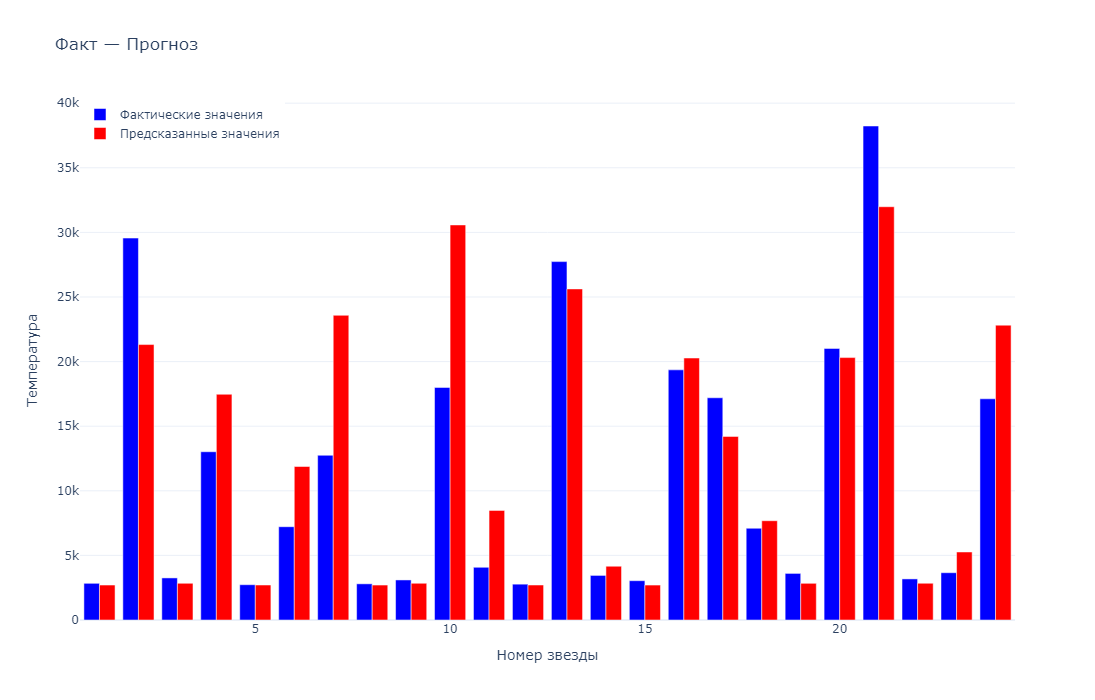

In [68]:
results_df = pd.DataFrame({
    'Actual': y_test_tensor[:50],
    'Predicted': y_test_pred_.flatten()[:50]
})

# Создаём список индексов от 1 до 20 для оси X
indices = list(range(1, len(results_df) + 1))

# Создание графика с помощью Plotly
fig = go.Figure()

# Добавление фактических значений
fig.add_trace(go.Bar(
    x=indices,
    y=results_df['Actual'],
    name='Фактические значения',
    marker=dict(color='blue')
))

# Добавление предсказанных значений
fig.add_trace(go.Bar(
    x=indices,
    y=results_df['Predicted'],
    name='Предсказанные значения',
    marker=dict(color='red')
))

# Добавление настроек графика, включая размеры
fig.update_layout(
    title='Факт — Прогноз',
    xaxis_title='Номер звезды',
    yaxis_title='Температура',
    legend=dict(x=0, y=1),
    template='plotly_white',
    width=1000,    # Ширина графика в пикселях
    height=700,    # Высота графика в пикселях
    barmode='group' # Размещение столбцов рядом для лучшего сравнения
)

# Отображение графика
fig.show()

##### Выводы:

**лучше всего с помощью данной модели прогнозируются звезды с температурой 0-8000 К**

* Это типы звезд: 
1. Красный карлик, 
2. коричневый карлик, 
3. часть звезд главной последовательности (цвета от бело-желтого до оранжевого), 
4. супергигант цвета red, 

* прогнозирование температуры звезд с температурой от 8000 и выше  затруднительно. 

<div style="padding:0px 20px 10px; 
            color:#4B2E2E;
            font-size:15px;
            display:fill;
            text-align:center;
            border-radius:0px;
            border: 5px double;
            border-color:blue;
            background-color: #D3D3D3;
            overflow:hidden;
            font-weight:400"> 
    
### Общие выводы
    
</div>

### **Для выполнения поставленных задач нами было выполнено:**

1. Провели загрузку данных.

2. Провели исследовательский анализ данных, удалили неявные дубликатыю, были использованы статистические тесты, построены графики

3. Провели корреляционный анализ данных, с помощью которого выявили связи между признаками.

4. Использовали модель нейронной сети, получили метрику **Best RMSE test 3973** .Это хороший результат, модель хорошо прогнозирует температуру звезд в диапазоне от 0- 15 000 К

6. осуществили подбор гиперпараметров, использовали раннюю остановку, что позволило нам избежать переобучения модели, получили предсказания. 

7. Получили метрику с использованием базовой модели и с помощью лучших гиперпараметров. Лучшая метрика с подбором гиперпараметров: **Best RMSE test 4572**. т.е нам не удалось с помощью усложнения модели улучшить результат ее работы. Иногда менее сложные модели дают хороший результат 

8. Результат зафиксирован графически.

9. **Улучшить качество модели поможет:**

* увеличение количества скрытых нейронов: Попробуйте добавить больше нейронов в скрытые слои. Например, можно увеличить значения n_hidden_neurons_1, n_hidden_neurons_2 и n_hidden_neurons_3.

* Добавление больше слоев: Можно добавить дополнительные слои. Иногда глубже сети могут лучше захватывать сложные паттерны.

* Изменение функции активации: Вместо ReLU можно рассмотреть использование других функций активации, таких как Leaky ReLU или ELU.

* Параметры регуляризации: Попробуйте изменить параметры регуляризации, такие как weight_decay. Меньшие или большие значения могут помочь улучшить качество.

* Настройка скорости обучения: Проверьте, как меняется метрика при изменении скорости обучения (lr). Возможно, стоит использовать адаптивные методы, такие как ReduceLROnPlateau, чтобы динамически изменять скорость обучения.

* Использование Batch Normalization: Добавление слоев нормализации может помочь ускорить обучение и улучшить метрики.

* Увеличение объема данных: Контроль данных и увеличение объемов данных путем аугментации или использования новых источников данных может улучшить модель.
